# Agenda
## Euler 79
## GroupBy
## Collections
## Co-Routines :: yield
## Pandas $\ldots$
## Matplotlib, bokeh, seaborn $\ldots$
## graphviz
## Flyby: numpy, scipy, scikitlearn

In [325]:
#!wget "https://projecteuler.net/resources/documents/0079_keylog.txt"
!cat "0079_keylog.txt"


319
680
180
690
129
620
762
689
762
318
368
710
720
710
629
168
160
689
716
731
736
729
316
729
729
710
769
290
719
680
318
389
162
289
162
718
729
319
790
680
890
362
319
760
316
729
380
319
728
716


# Answer lies in the 10! permutations of "0123456789"

In [326]:
keylog = [line.strip() for line in open("0079_keylog.txt")]


In [327]:
print(keylog)


['319', '680', '180', '690', '129', '620', '762', '689', '762', '318', '368', '710', '720', '710', '629', '168', '160', '689', '716', '731', '736', '729', '316', '729', '729', '710', '769', '290', '719', '680', '318', '389', '162', '289', '162', '718', '729', '319', '790', '680', '890', '362', '319', '760', '316', '729', '380', '319', '728', '716']


In [328]:
firsts = set([key[0] for key in keylog])


In [329]:
print(firsts)


{'3', '8', '2', '1', '7', '6'}


In [330]:
seconds = set([key[1] for key in keylog])


In [331]:
print(seconds)


{'3', '8', '2', '9', '1', '6'}


In [332]:
thirds = set([key[2] for key in keylog])


In [333]:
print(thirds)


{'0', '8', '2', '9', '1', '6'}


In [334]:
firsts - seconds - thirds


{'7'}

In [335]:
uniques = firsts | seconds | thirds


In [336]:
print(sorted(uniques))


['0', '1', '2', '3', '6', '7', '8', '9']


# Answer lies in the 7! permutations of "7" + "0123689"

In [337]:
only_thirds = thirds - firsts - seconds


In [338]:
print(only_thirds)


{'0'}


# Answer lies in the 6! permutations of "7" + "123689"  + "0"

In [339]:
seconds - firsts


{'9'}

In [340]:
seconds - firsts - thirds


set()

## Go through each of the 6! possibilities validating against the keylogs

In [341]:
# '319' => 3 must occur before 1 which must be before 9 in the answer
def occurs_in_order(needles: str, haystack: str) -> bool:
    a = haystack.index(needles[0])
    b = haystack.index(needles[1])
    c = haystack.index(needles[2])
    return a < b < c


In [342]:
haystack = "71236890"
needle = "319"
print(haystack.index("3"), haystack.index("1"), haystack.index("9"))
print(3 < 1 < 6)


3 1 6
False


In [343]:
from itertools import permutations as nPr

possible_passcodes = ["7" + "".join(_) + "0" for _ in nPr("123689", 6)]


# GroupBy

In [344]:
words = ["past", "post", "stop", "junk", "cast", "plod", "opts", "cats", "caats"]


In [345]:
"".join(sorted("past"))


'apst'

In [346]:
sorted(words, key=sorted)


['caats', 'cast', 'cats', 'past', 'plod', 'junk', 'post', 'stop', 'opts']

In [347]:
import itertools


In [348]:
for x in itertools.groupby(sorted(words, key=sorted), key=sorted):
    print(x)


(['a', 'a', 'c', 's', 't'], <itertools._grouper object at 0x122e69f60>)
(['a', 'c', 's', 't'], <itertools._grouper object at 0x122e6a770>)
(['a', 'p', 's', 't'], <itertools._grouper object at 0x122e6a6b0>)
(['d', 'l', 'o', 'p'], <itertools._grouper object at 0x122e6a770>)
(['j', 'k', 'n', 'u'], <itertools._grouper object at 0x122e6a6b0>)
(['o', 'p', 's', 't'], <itertools._grouper object at 0x122e6a770>)


In [349]:
for x in itertools.groupby(sorted(words, key=sorted), key=sorted):
    print("".join(x[0]), x[1])


aacst <itertools._grouper object at 0x122e6bc70>
acst <itertools._grouper object at 0x122e6a770>
apst <itertools._grouper object at 0x122e6abf0>
dlop <itertools._grouper object at 0x122e6a770>
jknu <itertools._grouper object at 0x122e6abf0>
opst <itertools._grouper object at 0x122e6a770>


In [350]:
for x in itertools.groupby(sorted(words, key=sorted), key=sorted):
    print("".join(x[0]), list(x[1]))


aacst ['caats']
acst ['cast', 'cats']
apst ['past']
dlop ['plod']
jknu ['junk']
opst ['post', 'stop', 'opts']


In [351]:
for x in itertools.groupby(words, key=sorted):
    print("".join(x[0]), list(x[1]))


apst ['past']
opst ['post', 'stop']
jknu ['junk']
acst ['cast']
dlop ['plod']
opst ['opts']
acst ['cats']
aacst ['caats']


In [352]:
for x in itertools.groupby(sorted(words), key=sorted):
    print("".join(x[0]), list(x[1]))


aacst ['caats']
acst ['cast', 'cats']
jknu ['junk']
opst ['opts']
apst ['past']
dlop ['plod']
opst ['post', 'stop']


# container classes

In [353]:
s = """In a galaxy far far away, long long ago the empire ruled with an iron hand
But there was a rebellion supported by well-meaning people. The resulting war
was long and arduos."""


In [354]:
freq = dict()
for ch in s:
    if ch not in freq:
        freq[ch] = 1
    else:
        freq[ch] += 1
print(freq)


{'I': 1, 'n': 12, ' ': 29, 'a': 17, 'g': 7, 'l': 11, 'x': 1, 'y': 3, 'f': 2, 'r': 11, 'w': 6, ',': 1, 'o': 9, 't': 6, 'h': 5, 'e': 15, 'm': 2, 'p': 5, 'i': 6, 'u': 5, 'd': 5, '\n': 2, 'B': 1, 's': 5, 'b': 2, '-': 1, '.': 2, 'T': 1}


In [355]:
from collections import defaultdict as ddict


In [356]:
freq = ddict(int)
for ch in s:
    freq[ch] += 1
print(freq)


defaultdict(<class 'int'>, {'I': 1, 'n': 12, ' ': 29, 'a': 17, 'g': 7, 'l': 11, 'x': 1, 'y': 3, 'f': 2, 'r': 11, 'w': 6, ',': 1, 'o': 9, 't': 6, 'h': 5, 'e': 15, 'm': 2, 'p': 5, 'i': 6, 'u': 5, 'd': 5, '\n': 2, 'B': 1, 's': 5, 'b': 2, '-': 1, '.': 2, 'T': 1})


In [357]:
from collections import Counter


In [358]:
freq = Counter(s)


In [359]:
freq.most_common(5)


[(' ', 29), ('a', 17), ('e', 15), ('n', 12), ('l', 11)]

In [360]:
type(freq)


collections.Counter

In [361]:
"rebel" in s


True

In [362]:
ss = s.split()


In [363]:
wfreq = Counter(ss)


In [364]:
wfreq.most_common(10)


[('long', 3),
 ('a', 2),
 ('far', 2),
 ('was', 2),
 ('In', 1),
 ('galaxy', 1),
 ('away,', 1),
 ('ago', 1),
 ('the', 1),
 ('empire', 1)]

In [365]:
!wc 0079_keylog.txt


      50      50     200 0079_keylog.txt


# Coroutines

In [366]:
def make_fibs(limit: int) -> list[int]:
    a, b = 0, 1
    fibs = []
    while a < limit:
        fibs.append(a)
        # return a
        a, b = b, a + b
    return fibs


In [367]:
make_fibs(100)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [368]:
def gen_fibs(limit: int):
    a, b = 0, 1
    while a < limit:
        yield a
        a, b = b, a + b


In [369]:
for n in gen_fibs(100):
    print(n, end=" ")


0 1 1 2 3 5 8 13 21 34 55 89 

In [370]:
a = gen_fibs(200)


In [371]:
print(a)


<generator object gen_fibs at 0x122b8a5a0>


In [372]:
count = 0
for n in a:
    count += 1
    print(n)
    if count > 5:
        break


0
1
1
2
3
5


In [373]:
print(a)


<generator object gen_fibs at 0x122b8a5a0>


In [374]:
for x in a:
    print(x)


8
13
21
34
55
89
144


In [375]:
for p in a:
    print(p)


In [376]:
def square(x):
    return x * x


In [377]:
xs = [1, 1, 2, 3, 5, 8, 13]


In [378]:
map(square, xs)


In [379]:
a = map(square, xs)


In [380]:
for n in a:
    print(n)


1
1
4
9
25
64
169


In [381]:
for n in a:
    print(n)


In [382]:
lc = [square(x) for x in xs]


In [383]:
gg = (square(x) for x in xs)


In [384]:
print(lc)


[1, 1, 4, 9, 25, 64, 169]


In [385]:
print(gg)


<generator object <genexpr> at 0x122b89b10>


In [386]:
for g in gg:
    print(g, end=" ")
print("Fini!")
for g in gg:
    print(g, end=" ")


1 1 4 9 25 64 169 Fini!


In [387]:
for p in lc:
    print(p, end=" ")
print("One Round over")
for p in lc:
    print(p, end=" ")


1 1 4 9 25 64 169 One Round over
1 1 4 9 25 64 169 

# Data Munging

In [388]:
!head weight-height_10000.csv


Gender,Height,Weight
Male,73.84701702,241.8935632
Male,68.78190405,162.3104725
Male,74.11010539,212.7408556
Male,71.7309784,220.0424703
Male,69.88179586,206.3498006
Male,67.25301569,152.2121558
Male,68.78508125,183.9278886
Male,68.34851551,167.9711105
Male,67.01894966,175.9294404


In [389]:
!tail weight-height_10000.csv


Female,63.17949825,141.2660996
Female,62.63667493,102.8535632
Female,62.07783169,138.6916803
Female,60.03043377,97.68743226
Female,59.09825003,110.5296857
Female,66.17265215,136.7774542
Female,67.06715465,170.8679059
Female,63.86799221,128.4753188
Female,69.03424313,163.8524613
Female,61.94424588,113.6491027

In [390]:
!wc -l weight-height_10000.csv


   10000 weight-height_10000.csv


In [391]:
COMMA = ","
FIRST_LINE = True
data = []
for line in open("weight-height_10000.csv"):
    data.append(line.strip())


In [392]:
print(data[:10])


['Gender,Height,Weight', 'Male,73.84701702,241.8935632', 'Male,68.78190405,162.3104725', 'Male,74.11010539,212.7408556', 'Male,71.7309784,220.0424703', 'Male,69.88179586,206.3498006', 'Male,67.25301569,152.2121558', 'Male,68.78508125,183.9278886', 'Male,68.34851551,167.9711105', 'Male,67.01894966,175.9294404']


In [393]:
COMMA = ","
FIRST_LINE = True
data = []
for line in open("weight-height_10000.csv"):
    if FIRST_LINE:
        FIRST_LINE = False
    else:
        data.append(line.strip())


In [394]:
print(data[:10])


['Male,73.84701702,241.8935632', 'Male,68.78190405,162.3104725', 'Male,74.11010539,212.7408556', 'Male,71.7309784,220.0424703', 'Male,69.88179586,206.3498006', 'Male,67.25301569,152.2121558', 'Male,68.78508125,183.9278886', 'Male,68.34851551,167.9711105', 'Male,67.01894966,175.9294404', 'Male,63.45649398,156.3996764']


In [395]:
COMMA = ","
FIRST_LINE = True
data = []
for line in open("weight-height_10000.csv"):
    if FIRST_LINE:
        FIRST_LINE = False
    else:
        g, h, w = line.strip().split(COMMA)
        data.append((g, h, w))


In [396]:
print(data[:10])


[('Male', '73.84701702', '241.8935632'), ('Male', '68.78190405', '162.3104725'), ('Male', '74.11010539', '212.7408556'), ('Male', '71.7309784', '220.0424703'), ('Male', '69.88179586', '206.3498006'), ('Male', '67.25301569', '152.2121558'), ('Male', '68.78508125', '183.9278886'), ('Male', '68.34851551', '167.9711105'), ('Male', '67.01894966', '175.9294404'), ('Male', '63.45649398', '156.3996764')]


In [397]:
COMMA = ","
FIRST_LINE = True
data = []
for line in open("weight-height_10000.csv"):
    if FIRST_LINE:
        FIRST_LINE = False
    else:
        g, raw_h, raw_w = line.strip().split(COMMA)
        h = float(raw_h)
        w = float(raw_w)
        data.append((g, h, w))


In [398]:
print(data[:10])


[('Male', 73.84701702, 241.8935632), ('Male', 68.78190405, 162.3104725), ('Male', 74.11010539, 212.7408556), ('Male', 71.7309784, 220.0424703), ('Male', 69.88179586, 206.3498006), ('Male', 67.25301569, 152.2121558), ('Male', 68.78508125, 183.9278886), ('Male', 68.34851551, 167.9711105), ('Male', 67.01894966, 175.9294404), ('Male', 63.45649398, 156.3996764)]


In [399]:
COMMA = ","
FIRST_LINE = True
IN2CM, LB2KG = 2.54, 0.454
data = []
for line in open("weight-height_10000.csv"):
    if FIRST_LINE:
        FIRST_LINE = False
    else:
        g, raw_h, raw_w = line.strip().split(COMMA)
        h = int(float(raw_h) * IN2CM + 0.5)
        w = int(float(raw_w) * LB2KG + 0.5)
        data.append((g, h, w))


In [400]:
print(data[:10])


[('Male', 188, 110), ('Male', 175, 74), ('Male', 188, 97), ('Male', 182, 100), ('Male', 177, 94), ('Male', 171, 69), ('Male', 175, 84), ('Male', 174, 76), ('Male', 170, 80), ('Male', 161, 71)]


In [401]:
import pandas as pd


In [402]:
data = pd.read_csv("weight-height_10000.csv")


In [403]:
data


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [404]:
data.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [405]:
data["Height"]


0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [406]:
data.Weight


0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [407]:
def in2cm(s: str) -> int:
    return int(2.54 * float(s) + 0.5)


def lb2kg(s: str) -> int:
    return int(0.454 * float(s) + 0.5)


In [408]:
data = pd.read_csv(
    "weight-height_10000.csv", converters={"Height": in2cm, "Weight": lb2kg}
)


In [409]:
data


,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,97
3,Male,182,100
4,Male,177,94
...,...,...,...
9995,Female,168,62
9996,Female,170,78
9997,Female,162,58
9998,Female,175,74


In [410]:
# cat sample.txt


In [411]:
# cat sample2.txt


In [412]:
# data = pd.read_csv("sample.txt")


In [413]:
# data


In [414]:
# data = pd.read_csv("sample.txt", header=None)


In [415]:
# data


In [416]:
# data = pd.read_csv("sample.txt", header=None, names=["Name", "Score"])


In [417]:
# data


In [418]:
# data = pd.read_csv("sample2.txt")


In [419]:
# data


In [420]:
# data.Name


In [421]:
# data.Score


In [422]:
# data[" Score"]


In [423]:
# data = pd.read_csv("sample2.txt", header=0, names=["Moniker", "Mark"])


In [424]:
# data


In [425]:
pd.read_csv?


Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [426]:
pd.read_excel?


Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

In [427]:
data = pd.read_csv(
    "weight-height_10000.csv", converters={"Height": in2cm, "Weight": lb2kg}
)


In [428]:
data


,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,97
3,Male,182,100
4,Male,177,94
...,...,...,...
9995,Female,168,62
9996,Female,170,78
9997,Female,162,58
9998,Female,175,74


In [429]:
data.to_excel("ghw_processed.xlsx")


In [430]:
men = data[(data.Gender == "Male")]


In [431]:
men.describe()


,Height,Weight
count,5000.000000,5000.000000
mean,175.327000,84.901200
std,7.286748,8.982181
min,148.000000,51.000000
25%,171.000000,79.000000
50%,175.000000,85.000000
75%,180.000000,91.000000
max,201.000000,123.000000


In [432]:
tall = data[(data.Height >= 180)]
tall.describe()


,Height,Weight
count,1455.000000,1455.000000
mean,183.891409,93.872165
std,3.612111,6.121209
min,180.000000,73.000000
25%,181.000000,90.000000
50%,183.000000,93.000000
75%,186.000000,98.000000
max,201.000000,123.000000


In [433]:
tallmen = data[(data.Gender == "Male") & (data.Height >= 180)]
tallmen


,Gender,Height,Weight
0,Male,188,110
2,Male,188,97
3,Male,182,100
10,Male,181,85
11,Male,182,97
...,...,...,...
4988,Male,180,87
4989,Male,185,99
4992,Male,182,93
4994,Male,186,88


# Matplotlib

In [434]:
import matplotlib.pyplot as plt


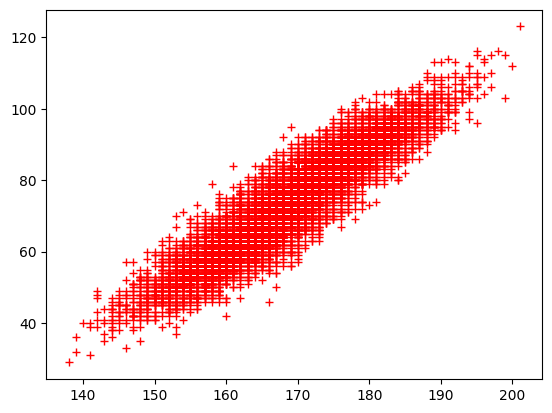

In [435]:
plt.plot(data.Height, data.Weight, "r+")
plt.show()


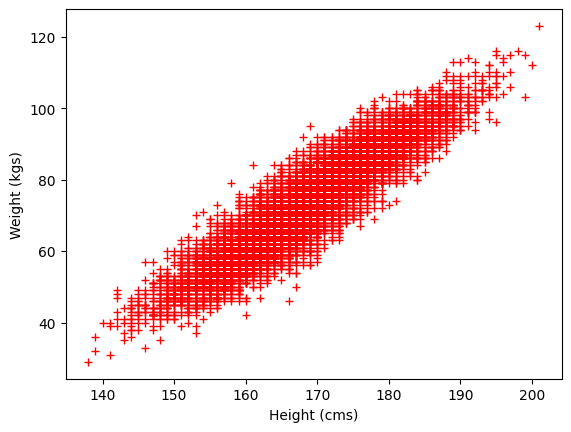

In [436]:
plt.plot(data.Height, data.Weight, "r+")
plt.xlabel("Height (cms)")
plt.ylabel("Weight (kgs)")
plt.show()


In [437]:
men = data[data.Gender == "Male"]
women = data[data.Gender == "Female"]
tall = data[data.Height >= 180]


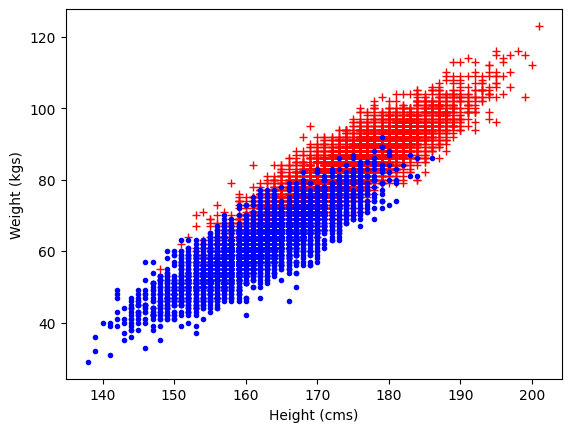

In [438]:
plt.plot(men.Height, men.Weight, "r+")
plt.plot(women.Height, women.Weight, "b.")
plt.xlabel("Height (cms)")
plt.ylabel("Weight (kgs)")
plt.savefig("mw.png")
plt.show()


In [439]:
plt.savefig("mw.png")


<Figure size 640x480 with 0 Axes>

# Graphviz

In [441]:
import pygraphviz as pgv


ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
!apt install pygraphviz


In [ ]:
!apt search pygraphviz


In [ ]:
!apt install python3-pygraphviz


In [ ]:
import pygraphviz as pgv


In [ ]:
g = pgv.AGraph(directed=True)
g.add_node("a")
g.add_node("b")
g.add_nodes_from(["c", "d", "e", "f", "dd"])
g.add_edge("a", "b")
g.add_edge("b", "c")
g.add_edge("b", "d")
g.add_edge("c", "f")
g.add_edge("d", "dd")
g.add_edge("dd", "f")


In [ ]:
g.layout()
g.draw("pgv.png")
